# 필요한 코드, 데이터를 깃허브에서 받아오기

In [ ]:
!git clone https://github.com/wesm/pydata-book.git

Cloning into 'pydata-book'...
remote: Enumerating objects: 558, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 558 (delta 24), reused 3 (delta 3), pack-reused 527 (from 2)
Receiving objects: 100% (558/558), 63.76 MiB | 10.33 MiB/s, done.
Resolving deltas: 100% (210/210), done.
Updating files: 100% (209/209), done.


In [ ]:
# csv파일 복사
!cp pydata-book/examples/ex1.csv ex1.csv
!cp pydata-book/examples/csv_mindex.csv csv_mindex.csv
!cp pydata-book/examples/ex5.csv ex5.csv

In [ ]:
import numpy as np
import pandas as pd

# Pandas: Python Data Analysis Library [[pandas.pydata.org](https://pandas.pydata.org/)]
---
* 데이터 분석(탐색,조작 등)을 위한 Python 기반의 오픈 소스 라이브러리
* Python의 Excel이라고 부름: Excel 내 대부분의 기능 포함
* NumPy의 객체가 Ndarray, array 라면, Pandas의 기본 객체는 Series, DataFrame 임
  * DataFrame은 여러 개의 Series로 구성됨
  * Ndarray와 DataFrame 서로 호환됨

---
# 학습목표
* 데이터분석의 전처리 과정을 위해 DataFrame 객체에 원하는 정제(Cleaning), 조작(Transformation) 방법을 살펴본다.

* 실제 데이터 파일(ex.csv파일)을 불러오고 저장하는 방법을 살펴본다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning and Preparation

* 실질적인 데이터 전처리 과정
* 결측치 처리, 데이터 조작(Transformation) 등
* 데이터 타입(ex. string, categorical 등) 별 조작

## Handling Missing Data

* 기본적으로 `np.nan` 이 실수형(`np.float64`) 결측치로 설정 됨
      display(np.nan); Nan
* 결측치 처리 관련 주요 함수  

| Method   	| Description                                                                                                                                 	|
|----------	|---------------------------------------------------------------------------------------------------------------------------------------------	|
| `dropna` 	| Filter axis labels based on whether values for each label have missing data, with varying thresholds for how much missing data to tolerate. 	|
| `fillna` 	| Fill in missing data with some value or using an interpolation method such as "ffill" or "bfill".                                           	|
| `isna`   	| Return a Series containing unique values as its index and frequencies as its values, ordered count in descending order                      	|
| `notna`  	| Negation of isna, returns True for non-NA values and False for NA values.                                                                   	|

In [ ]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],[np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])

print("Original")
display(data)
print()

# 결측치가 존재하는 행 모두 삭제
print("data.dropna()")
display(data.dropna()) # default: axis = 0, how = 'any' = 하나라도 결측되어 있으면 제거
print()

# 결측치가 존재하는 열 모두 삭제
print("data.dropna(axis=1)")
display(data.dropna(axis=1))
print()

# 모든 원소가 결측되어 있는 행 삭제
print("data.dropna(how='all')") # 행의 모든 원소가 다 결측되어 있는 경우 제거
display(data.dropna(how='all'))
print()

# 모든 원소가 결측되어 있는 열 삭제
data[4] = np.nan

print("\n결측치 열 추가:")
display(data)

print("data.dropna(axis=1, how='all')")
display(data.dropna(axis=1, how='all'))
print()


Original


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0



data.dropna()


,0,1,2
0,1.0,6.5,3.0



data.dropna(axis=1)


""
0
1
2
3



data.dropna(how='all')


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0




결측치 열 추가:


,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


data.dropna(axis=1, how='all')


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
# thresh: 결측치 확인 기준 축에서 적어도 'thresh' 개 만큼 결측치 데이터가 존재할 시 해당 행/열은 제거함
np.random.seed(123)
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan

print("Original")
display(df)
print("\n")

print("df.dropna()")
display(df.dropna())
print('\n')

print('df.dropna(thresh=2)')
display(df.dropna(thresh=2))
print('\n')

display(df)

Original


,0,1,2
0,-1.085631,NaN,NaN
1,-1.506295,NaN,NaN
2,-2.426679,NaN,1.265936
3,-0.866740,NaN,-0.094709
4,1.491390,-0.638902,-0.443982
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369




df.dropna()


,0,1,2
4,1.491390,-0.638902,-0.443982
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369




df.dropna(thresh=2)


,0,1,2
2,-2.426679,NaN,1.265936
3,-0.866740,NaN,-0.094709
4,1.491390,-0.638902,-0.443982
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369


,0,1,2
0,-1.085631,NaN,NaN
1,-1.506295,NaN,NaN
2,-2.426679,NaN,1.265936
3,-0.866740,NaN,-0.094709
4,1.491390,-0.638902,-0.443982
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369


* inplace: 원본의 데이터프레임에 수정사항을 적용하고 싶을 때 `True`로 설정함

In [ ]:
print("df.dropna(inplace=True)")
display(df.dropna(inplace=True)) # 반환값은 없이 바로 적용되고 후에 데이터프레임 원본을 출력시켜 확인
print('\n')

print('df')
display(df)

df.dropna(inplace=True)


None



df


,0,1,2
4,1.491390,-0.638902,-0.443982
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369


## Filling in Missing Data

* `df.fillna()`
* 결측치를 원하는 방식으로 대체함  

| Argument 	| Description                                                                                     	|
|----------	|-------------------------------------------------------------------------------------------------	|
| `value`  	| Scalar value or dictionary-like object to use to fill missing values                            	|
| `method` 	| Interpolation method: one of "bfill" (backward fill) or "ffill" (forward fill); default is None 	|
| `axis`   	| Axis to fill on ("index" or "columns"); default is axis="index"                                 	|
| `limit`  	| For forward and backward filling, maximum number of consecutive periods to fill                 	|


In [ ]:
print(df.fillna.__doc__)


Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series:

    * ffill: propagate last valid observation forward to next valid.
    * backfill / bfill: use next valid observation to fill gap.

    .. deprecated:: 2.1.0
        Use ffill or bfill instead.

axis : {0 or 'index'} for Series, {0 or 'index', 1 or 'columns'} for DataFrame
    Axis along which to fill missing values. For `Series`
    this parameter is unused and defaults to 0.
inplace : bool, default False
    If True, fill in-place. Note: this will modify any
    other views on 

### 모든 결측치를 특정 상수로 대체

In [ ]:
np.random.seed(123)
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan

print("Original")
display(df)
print("\n")

constant = 0
print('df.fillna(constant)')
display(df.fillna(constant))
print('\n')


Original


,0,1,2
0,-1.085631,NaN,NaN
1,-1.506295,NaN,NaN
2,-2.426679,NaN,1.265936
3,-0.866740,NaN,-0.094709
4,1.491390,-0.638902,-0.443982
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369




df.fillna(constant)


,0,1,2
0,-1.085631,0.000000,0.000000
1,-1.506295,0.000000,0.000000
2,-2.426679,0.000000,1.265936
3,-0.866740,0.000000,-0.094709
4,1.491390,-0.638902,-0.443982
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369


### 열마다 다르게 결측치 대체함

Dictionary 이용

In [ ]:
# 굉장히 유용한 방법임
df.columns = ['A','B','C']
display(df)

print("\ndf.fillna({'B':0.5,'C':100})")
display(df.fillna({"B":0.5,"C":100}))

,A,B,C
0,-1.085631,NaN,NaN
1,-1.506295,NaN,NaN
2,-2.426679,NaN,1.265936
3,-0.866740,NaN,-0.094709
4,1.491390,-0.638902,-0.443982
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369



df.fillna({'B':0.5,'C':100})


,A,B,C
0,-1.085631,0.500000,100.000000
1,-1.506295,0.500000,100.000000
2,-2.426679,0.500000,1.265936
3,-0.866740,0.500000,-0.094709
4,1.491390,-0.638902,-0.443982
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369


* bfill: 결측치 다음에 나타나는 첫 실측 데이터로 결측치 대체
* ffill: 결측치 이전에 나타나는 마지막 실측 데이터로 결측치 대체

In [ ]:
df.iloc[:2,1] = [0.3,0.7]
df.iloc[:2,2] = [0.1,0.2]
df.iloc[3:5,2] = np.nan
df.columns = ['A','B','C']

print("Original")
display(df)
print("\n")

# ffill
print("df.fillna(method='ffill')")
display(df.fillna(method='ffill'))
print('\n')

#bfill
print("df.fillna(method='bfill')")
display(df.fillna(method='bfill'))
print('\n')

Original


,A,B,C
0,-1.085631,0.300000,0.100000
1,-1.506295,0.700000,0.200000
2,-2.426679,NaN,1.265936
3,-0.866740,NaN,NaN
4,1.491390,-0.638902,NaN
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369




df.fillna(method='ffill')


/tmp/ipython-input-2725023732.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  display(df.fillna(method='ffill'))


,A,B,C
0,-1.085631,0.300000,0.100000
1,-1.506295,0.700000,0.200000
2,-2.426679,0.700000,1.265936
3,-0.866740,0.700000,1.265936
4,1.491390,-0.638902,1.265936
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369




df.fillna(method='bfill')


/tmp/ipython-input-2725023732.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  display(df.fillna(method='bfill'))


,A,B,C
0,-1.085631,0.300000,0.100000
1,-1.506295,0.700000,0.200000
2,-2.426679,-0.638902,1.265936
3,-0.866740,-0.638902,2.186786
4,1.491390,-0.638902,2.186786
5,-0.434351,2.205930,2.186786
6,1.004054,0.386186,0.737369


# Data Transformation

## Removing Duplicates

* `df.duplicated()` : 행 기준으로 모든 열의 값이 같은 데이터가 있을 시 중복된 것으로 인지 / 중복된 데이터 = `True`, 그 외 = `False` 로 출력됨

  * Parameters
    * subset : column label or sequence of labels, optional  
      Only consider certain columns for identifying duplicates, by
      default use all of the columns.
    * keep : {'first', 'last', False}, default 'first'  
      Determines which duplicates (if any) to mark.

      - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
      - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
      - False : Mark all duplicates as ``True``.

* `df.drop_duplicates()` : 중복된 데이터(샘플) 제거  
  * Parameters  
      * subset : column label or sequence of labels, optional  
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.  
      * keep : {'first', 'last', False}, default 'first'  
        Determines which duplicates (if any) to keep.
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.  
      * inplace : bool, default False
          Whether to modify the DataFrame rather than creating a new one.
      * ignore_index : bool, default False
          If True, the resulting axis will be labeled 0, 1, …, n - 1.

In [ ]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],"k2": [1, 1, 2, 3, 3, 4, 4]})
display(data) # 5,6번 샘플 중복됨

print("\ndata.duplicated(keep=False)")
display(data.duplicated(keep=False))


print("\ndata.duplicated(keep='first')")
display(data.duplicated(keep='first'))

print("\ndata.duplicated(keep='last')")
display(data.duplicated(keep='last'))

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4



data.duplicated(keep=False)


,0
0,False
1,False
2,False
3,False
4,False
5,True
6,True



data.duplicated(keep='first')


,0
0,False
1,False
2,False
3,False
4,False
5,False
6,True



data.duplicated(keep='last')


,0
0,False
1,False
2,False
3,False
4,False
5,True
6,False


In [ ]:
# 중복되는 쌍이 여러 개 있는 경우
# 어떤 것 끼리 중복되는지는 안 나와 있음

data = pd.DataFrame({"k1": ["one", "two"] * 3 ,"k2": [1, 2]*3})
display(data)

print("\ndata.duplicated(keep=False)")
display(data.duplicated(keep=False))


,k1,k2
0,one,1
1,two,2
2,one,1
3,two,2
4,one,1
5,two,2



data.duplicated(keep=False)


,0
0,True
1,True
2,True
3,True
4,True
5,True


In [ ]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],"k2": [1, 2, 1, 3, 3, 4, 4]})
display(data) # (0번,2번),(5번,6번) 샘플 중복됨

print("\ndata.drop_duplicates()") # keep = 'first' 가 기본값
display(data.drop_duplicates())

print("\ndata.drop_duplicates(keep='first')")
display(data.drop_duplicates(keep='first'))

print("\ndata.drop_duplicates(keep='last')")
display(data.drop_duplicates(keep='last'))

print("\ndata.drop_duplicates(keep=False)")
display(data.drop_duplicates(keep=False))

,k1,k2
0,one,1
1,two,2
2,one,1
3,two,3
4,one,3
5,two,4
6,two,4



data.drop_duplicates()


,k1,k2
0,one,1
1,two,2
3,two,3
4,one,3
5,two,4



data.drop_duplicates(keep='first')


,k1,k2
0,one,1
1,two,2
3,two,3
4,one,3
5,two,4



data.drop_duplicates(keep='last')


,k1,k2
1,two,2
2,one,1
3,two,3
4,one,3
6,two,4



data.drop_duplicates(keep=False)


,k1,k2
1,two,2
3,two,3
4,one,3


In [ ]:
# 열 추가 후 subset 지정
data["v1"] = np.arange(7)
print("data")
display(data) # 모든 열을 고려했을 때 중복되는 행 없음

print("\ndata.drop_duplicates(['k1', 'k2'], keep='last')")
display(data.drop_duplicates(subset=['k1', 'k2'], keep='last')) # ['k1','k2']만 고려했을 시 (0,2),(5,6)번 행이 각각 중복

data


,k1,k2,v1
0,one,1,0
1,two,2,1
2,one,1,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6



data.drop_duplicates(['k1', 'k2'], keep='last')


,k1,k2,v1
1,two,2,1
2,one,1,2
3,two,3,3
4,one,3,4
6,two,4,6


## Transforming Data Using a Function or Mapping(복습)

* 특정 규칙에 따라 기존의 값을 원하는 값으로 변경하기
* 원하는 열의 `map`함수 이용
* `apply' 함수는 대상이 열 또는 행임

Dictionary 이용하기

In [ ]:
meat_to_type = {
  "bacon": "pork",
  "pulled pork": "pork",
  "pastrami": "beef",
  "corned beef": "beef",
  "honey ham": "pork",
  "nova lox": "salmon"
}

data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon","pastrami", "corned beef", "bacon","pastrami", "honey ham", "nova lox"],"ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
display(data)
display(data["food"].map(meat_to_type))
data["food"] = data["food"].map(meat_to_type) # 기존 'food'열을 바꿈
# data["type"] = data["food"].map(meat_to_type) # 새로운 column 'type' 입력
print("After mapping:")
display(data)

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


,food
0,pork
1,pork
2,pork
3,beef
4,beef
5,pork
6,beef
7,pork
8,salmon


After mapping:


,food,ounces
0,pork,4.0
1,pork,3.0
2,pork,12.0
3,beef,6.0
4,beef,7.5
5,pork,8.0
6,beef,3.0
7,pork,5.0
8,salmon,6.0


## Replacing Values Directly
* `df.replace()`

In [ ]:
data = pd.Series([1., -999., 2., -999., 1000., 3.])
print(f"Original:")
display(data)
print("\ndata.replace(-999,0)")
display(data.replace(-999,0))

print("\ndata.replace([-999,1000],0)")
display(data.replace([-999,1000],0))

print("\ndata.replace([-999,1000],[0,10])") # -999 -> 0 / 1000 -> 10으로 변경
display(data.replace([-999,1000],[0,10]))

print("\ndata.replace({-999:0,1000:10})") # 가장 직관적임
display(data.replace({-999:0,1000:10}))


Original:


,0
0,1.0
1,-999.0
2,2.0
3,-999.0
4,1000.0
5,3.0



data.replace(-999,0)


,0
0,1.0
1,0.0
2,2.0
3,0.0
4,1000.0
5,3.0



data.replace([-999,1000],0)


,0
0,1.0
1,0.0
2,2.0
3,0.0
4,0.0
5,3.0



data.replace([-999,1000],[0,10])


,0
0,1.0
1,0.0
2,2.0
3,0.0
4,10.0
5,3.0



data.replace({-999:0,1000:10})


,0
0,1.0
1,0.0
2,2.0
3,0.0
4,10.0
5,3.0


## Replacing Values using `map` function

In [ ]:
np.linspace(1,5,100,endpoint = True),np.linspace(1,5,100,endpoint = False)

(array([1.        , 1.04040404, 1.08080808, 1.12121212, 1.16161616,
        1.2020202 , 1.24242424, 1.28282828, 1.32323232, 1.36363636,
        1.4040404 , 1.44444444, 1.48484848, 1.52525253, 1.56565657,
        1.60606061, 1.64646465, 1.68686869, 1.72727273, 1.76767677,
        1.80808081, 1.84848485, 1.88888889, 1.92929293, 1.96969697,
        2.01010101, 2.05050505, 2.09090909, 2.13131313, 2.17171717,
        2.21212121, 2.25252525, 2.29292929, 2.33333333, 2.37373737,
        2.41414141, 2.45454545, 2.49494949, 2.53535354, 2.57575758,
        2.61616162, 2.65656566, 2.6969697 , 2.73737374, 2.77777778,
        2.81818182, 2.85858586, 2.8989899 , 2.93939394, 2.97979798,
        3.02020202, 3.06060606, 3.1010101 , 3.14141414, 3.18181818,
        3.22222222, 3.26262626, 3.3030303 , 3.34343434, 3.38383838,
        3.42424242, 3.46464646, 3.50505051, 3.54545455, 3.58585859,
        3.62626263, 3.66666667, 3.70707071, 3.74747475, 3.78787879,
        3.82828283, 3.86868687, 3.90909091, 3.94

In [ ]:
# np.linspace : np.arange와 비슷한 것으로 (시작숫자, 끝숫자) 까지 size 만큼의 수로 구성된 등차수열 생성
# endpoint = True로 할 시 끝 숫자 포함함 / 시작숫자는 무조건 포함됨


np.random.seed(123)

array = np.random.choice(np.linspace(1,5,100,endpoint = True), size =(5,5),replace = False)
data = pd.DataFrame(array)
print("Original")
display(data)

def get_ratio(ser):
  return ser/np.sum(ser)

data_ratio =  data.apply(get_ratio, axis = 1)
print("data_ratio")
display(data_ratio)

data_ratio['total'] = np.sum(data_ratio,axis=1)

display(data_ratio)

Original


,0,1,2,3,4
0,1.323232,3.828283,4.313131,2.131313,3.545455
1,1.000000,1.202020,3.020202,4.272727,1.161616
2,1.929293,3.626263,4.070707,3.424242,1.969697
3,2.696970,4.111111,2.535354,3.262626,4.030303
4,2.414141,4.555556,1.767677,2.171717,2.252525


data_ratio


,0,1,2,3,4
0,0.087392,0.252835,0.284857,0.140761,0.234156
1,0.093839,0.112796,0.283412,0.400948,0.109005
2,0.128447,0.241426,0.271015,0.227976,0.131137
3,0.162113,0.247116,0.152398,0.196114,0.242259
4,0.183423,0.346124,0.134305,0.165004,0.171144


,0,1,2,3,4,total
0,0.087392,0.252835,0.284857,0.140761,0.234156,1.0
1,0.093839,0.112796,0.283412,0.400948,0.109005,1.0
2,0.128447,0.241426,0.271015,0.227976,0.131137,1.0
3,0.162113,0.247116,0.152398,0.196114,0.242259,1.0
4,0.183423,0.346124,0.134305,0.165004,0.171144,1.0


In [ ]:
display(data_ratio.iloc[:,:4].applymap(lambda x: round(x,2)))

def round_2(x):
  return round(x,2)
display(data_ratio.iloc[:,:4].applymap(round_2))

/tmp/ipython-input-3696601547.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(data_ratio.iloc[:,:4].applymap(lambda x: round(x,2)))


,0,1,2,3
0,0.09,0.25,0.28,0.14
1,0.09,0.11,0.28,0.40
2,0.13,0.24,0.27,0.23
3,0.16,0.25,0.15,0.20
4,0.18,0.35,0.13,0.17


/tmp/ipython-input-3696601547.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(data_ratio.iloc[:,:4].applymap(round_2))


,0,1,2,3
0,0.09,0.25,0.28,0.14
1,0.09,0.11,0.28,0.40
2,0.13,0.24,0.27,0.23
3,0.16,0.25,0.15,0.20
4,0.18,0.35,0.13,0.17


## Renaming indices or columns

* `df.index.map()`
* `df.rename()`

In [ ]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=["Ohio", "Colorado", "New York"],columns=["one", "two", "three", "four"])



print("Original:")
display(data)

Original:


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [ ]:
def transform(x):
  return x.upper() # 문자열 데이터 내 각 알파벳을 대문자로 변경
display(data.index)
data.index = data.index.map(transform)
print("Index 대문자로 변경:")
display(data)

Index(['Ohio', 'Colorado', 'New York'], dtype='object')

Index 대문자로 변경:


,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [ ]:
# data = pd.DataFrame(np.arange(12).reshape((3, 4)),index=["Ohio", "Colorado", "New York"],columns=["one", "two", "three", "four"])
print("data")
display(data)

# 내장함수 이용(str.title, str.upper 등)
print("\ndata.rename(index=str.title, columns=str.upper)") #str.title = 첫 글자 및 띄어쓰기 후 첫 글자들을 모두 대문자로 변경
display(data.rename(index=str.title, columns=str.upper)) # 데이터 프레임 원본에 바로 변경되지 않고 변경된 모습 출력함

# 딕셔너리 이용
print('\ndata.rename(index={"OHIO": "INDIANA"},columns={"three": "peekaboo"}))')
display(data.rename(index={"OHIO": "INDIANA"},columns={"three": "peekaboo"}))


# 원본 데이터프레임 유지
print("\ndata")
display(data)

data


,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11



data.rename(index=str.title, columns=str.upper)


,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11



data.rename(index={"OHIO": "INDIANA"},columns={"three": "peekaboo"}))


,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11



data


,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


## Permutation and Random Sampling with NumPy

* np.random.permutation() 함수 이용
* 임의의 특정 개수 및 순서의 행 또는 열 선택(추출)
* `df.take([...]) = df.iloc[[...]]`
* `df.sample()`
  * Parameters
    * n : int, optional  
      Number of items from axis to return. Cannot be used with `frac`.  
      Default = 1 if `frac` = None.  
    * frac : float, optional  
        Fraction of axis items to return. Cannot be used with `n`.  
    * replace : bool, default False  
        Allow or disallow sampling of the same row more than once.
    * axis : {0 or ‘index’, 1 or ‘columns’, None}, default None  
        Axis to sample. Accepts axis number or name. Default is stat axis for given data type. For `Series` this parameter is unused and defaults to `None`.

In [ ]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))
print("Original")
display(df)

Original


,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [ ]:
np.random.seed(123)
sampler = np.random.permutation(5) # 0~4까지의 숫자를 무작위 순서로 나열
print(f"np.random.permutation(5):{sampler}")

# row 추출하게 됨
print("\ndf.take(sampler)")
display(df.take(sampler)) # sampler에 있는 번호를 인덱스의 번호로 인식함

print("\ndf.iloc[sampler]")
display(df.iloc[sampler])


np.random.permutation(5):[1 3 4 0 2]

df.take(sampler)


,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34
0,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20



df.iloc[sampler]


,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34
0,0,1,2,3,4,5,6
2,14,15,16,17,18,19,20


In [ ]:
# 열 추출 시, axis = "columns" 또는 1 추가 필요

np.random.seed(123)
column_sampler = np.random.permutation(7)
display(column_sampler)
display(df.take(column_sampler, axis=1))
print()
display(df.iloc[:,column_sampler])

array([1, 3, 4, 0, 2, 5, 6])

,1,3,4,0,2,5,6
0,1,3,4,0,2,5,6
1,8,10,11,7,9,12,13
2,15,17,18,14,16,19,20
3,22,24,25,21,23,26,27
4,29,31,32,28,30,33,34


,1,3,4,0,2,5,6
0,1,3,4,0,2,5,6
1,8,10,11,7,9,12,13
2,15,17,18,14,16,19,20
3,22,24,25,21,23,26,27
4,29,31,32,28,30,33,34


In [ ]:
# df.sample() 함수 사용
np.random.seed(123)
sample_arguments ={
    'n':3, # 3개의 행 또는 열 선택함(axis에 따라 변경)
    'replace':False, # 중복을 허용하지 않음
    'axis':0, # 행을 선택하겠음
}

display(df.sample(**sample_arguments)) # Parameters에 각 항목의 이름과 값을 딕셔너리 형태로 한 번에 입력할 수 있음
print()
display(df.sample(3,replace = False, axis=0))

,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20


## **Computing Indicator/Dummy Variables (중요)**

* `pd.get_dummies`
* 라벨 및 특정 종류들을 해당 라벨의 일치여부를 원소로 갖는 하나의 벡터로 표현하는 방법, 이때의 벡터를 `원핫벡터(one-hot vector)` 라고 부름



In [ ]:
# key:{a,b,c} 세 종류의 원소로 구성됨
# a,b,c 각각을 1과 0으로 구성된 벡터로 변환
np.random.seed(123)
data1 = np.random.permutation(6)
df = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],"data1": data1})
print("Original")
display(df)

# 각 원소가 열의 이름이 되는 새로운 DataFrame 형성
print("\npd.get_dummies(df['key'])")
display(pd.get_dummies(df['key']))



Original


,key,data1
0,b,1
1,b,3
2,a,4
3,c,0
4,a,2
5,b,5



pd.get_dummies(df['key'])


,a,b,c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


In [ ]:
# 열의 이름을 특정 접두사(prefix)와 함께 표시할 수 있도록 함
dummies = pd.get_dummies(df["key"])#, prefix="key")
df_with_dummy = df.join(dummies) # 다음 차례에서 볼 데이터 프레임간 결합 함수

print(f"df_with_dummy")
display(df_with_dummy)


df_with_dummy


,key,data1,a,b,c
0,b,1,False,True,False
1,b,3,False,True,False
2,a,4,True,False,False
3,c,0,False,False,True
4,a,2,True,False,False
5,b,5,False,True,False


## **df.groupby (중요)**
* 데이터가 복잡한 경우 기준에 따라 여러 그룹으로 나눠서 관찰하는 방법
* 일반적으로 기준을 '열'로 설정하는 경우가 많음

In [ ]:
import seaborn as sns

tips_df = sns.load_dataset('tips')
tips_df.rename(columns = {'sex':'gender'},inplace = True)
display(tips_df)

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
display(tips_df['day'].value_counts()) # series 임
display(tips_df['day'].value_counts().to_frame()) # dataframe 임


,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [ ]:
grouped_by_day = tips_df.groupby(['day'])
for key, group in grouped_by_day: # key는 'day'열 에 존재하는 값(Sat, Sun, Thur, Fri)가 됨
  print(f"* key: {key}")
  print(f"* group:\n")
  display(group) # group은 'day'의 각 값에 해당하는 샘플들을 모아놓은 데이터프레임
  print()

* key: ('Thur',)
* group:



/tmp/ipython-input-1363560672.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_day = tips_df.groupby(['day'])


,total_bill,tip,gender,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
202,13.00,2.00,Female,Yes,Thur,Lunch,2
203,16.40,2.50,Female,Yes,Thur,Lunch,2
204,20.53,4.00,Male,Yes,Thur,Lunch,4
205,16.47,3.23,Female,Yes,Thur,Lunch,3



* key: ('Fri',)
* group:



,total_bill,tip,gender,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2
99,12.46,1.50,Male,No,Fri,Dinner,2



* key: ('Sat',)
* group:



,total_bill,tip,gender,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2



* key: ('Sun',)
* group:



,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


Ex) 각 요일 별 데이터의 전체 통계량을 구하자

In [ ]:
tips_df.groupby('day')['total_bill'].apply(lambda x: x.describe())
# 함수 적용의 대상은 group된 데이터프레임 / 통계량을 구할 수 있는 열만 적용 됨

/tmp/ipython-input-3285781298.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_df.groupby('day')['total_bill'].apply(lambda x: x.describe())


day        
Thur  count    62.000000
      mean     17.682742
      std       7.886170
      min       7.510000
      25%      12.442500
      50%      16.200000
      75%      20.155000
      max      43.110000
Fri   count    19.000000
      mean     17.151579
      std       8.302660
      min       5.750000
      25%      12.095000
      50%      15.380000
      75%      21.750000
      max      40.170000
Sat   count    87.000000
      mean     20.441379
      std       9.480419
      min       3.070000
      25%      13.905000
      50%      18.240000
      75%      24.740000
      max      50.810000
Sun   count    76.000000
      mean     21.410000
      std       8.832122
      min       7.250000
      25%      14.987500
      50%      19.630000
      75%      25.597500
      max      48.170000
Name: total_bill, dtype: float64

### 다음과 같은 질문을 할 수 있음
  1. 각 요일별 total_bill의 평균은 얼마일까?  
  2. 각 요일마다 방문한 여성/남성의 수(비율)는 얼마나 될까?  
  3. 각 성별마다 평균적으로 내는 tip과 totall_bill은 어떻게 될까?  
  4. 각 시간대(저녁/점심)마다 여성과 남성이 내는 total_bill의 평균은 어떻게 될까?

In [ ]:
# 1) 각 요일별 total_bill의 평균은 얼마일까?

display(tips_df.groupby('day')['total_bill'].mean().to_frame())

# 만약 소숫점 둘째 자리까지만 보고 싶다면?
def round_2(x):
  return round(x,2)

print(f"\napplymap: round_2")
display(tips_df.groupby('day')['total_bill'].mean().to_frame().applymap(round_2))

/tmp/ipython-input-1753017621.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(tips_df.groupby('day')['total_bill'].mean().to_frame())


,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000



applymap: round_2


/tmp/ipython-input-1753017621.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(tips_df.groupby('day')['total_bill'].mean().to_frame().applymap(round_2))
/tmp/ipython-input-1753017621.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(tips_df.groupby('day')['total_bill'].mean().to_frame().applymap(round_2))


,total_bill
day,
Thur,17.68
Fri,17.15
Sat,20.44
Sun,21.41


In [ ]:
# 2) 각 요일마다 방문한 여성/남성의 수는 얼마나 될까?

day_gender_counts = tips_df.groupby('day')['gender'].value_counts()
display(day_gender_counts)
display(day_gender_counts.unstack(level=0)) # Multi-index 일 시, 특정 index를 column으로 변환해 나타내는 방법
print()
display(day_gender_counts.unstack(level=1)) # 가장 좌측부터 level=0 임 / level 1에 해당하는 index를 column으로 변환하겠다.

# Q. 남녀의 비율을 보고 싶으면?
def get_ratio(x):
  return x/sum(x)

print("\napply: get_ratio")
display(day_gender_counts.unstack(level=1).apply(get_ratio,axis=1))


/tmp/ipython-input-2178572518.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_gender_counts = tips_df.groupby('day')['gender'].value_counts()


day   gender
Thur  Female    32
      Male      30
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: count, dtype: int64

day,Thur,Fri,Sat,Sun
gender,,,,
Male,30,10,59,58
Female,32,9,28,18


gender,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18



apply: get_ratio


gender,Male,Female
day,,
Thur,0.483871,0.516129
Fri,0.526316,0.473684
Sat,0.678161,0.321839
Sun,0.763158,0.236842


In [ ]:
# 3) 각 성별마다 평균적으로 내는 tip과 totall_bill은 어떻게 될까?

gender_bills = tips_df.groupby('gender')[['tip','total_bill']]
for key, group in gender_bills:
  print(f"\n* key:{key}")
  display(group)



* key:Male


/tmp/ipython-input-2527161691.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_bills = tips_df.groupby('gender')[['tip','total_bill']]


,tip,total_bill
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
5,4.71,25.29
6,2.00,8.77
...,...,...
236,1.00,12.60
237,1.17,32.83
239,5.92,29.03
241,2.00,22.67



* key:Female


,tip,total_bill
0,1.01,16.99
4,3.61,24.59
11,5.00,35.26
14,3.02,14.83
16,1.67,10.33
...,...,...
226,2.00,10.09
229,2.88,22.12
238,4.67,35.83
240,2.00,27.18


In [ ]:
gender_bills = tips_df.groupby('gender')[['tip','total_bill']]
gender_bills.mean().applymap(round_2,)

/tmp/ipython-input-275973132.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_bills = tips_df.groupby('gender')[['tip','total_bill']]
/tmp/ipython-input-275973132.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gender_bills.mean().applymap(round_2,)


,tip,total_bill
gender,,
Male,3.09,20.74
Female,2.83,18.06


In [ ]:
# 4) 각 시간대(저녁/점심)마다 여성과 남성이 내는 total_bill의 평균은 어떻게 될까?

display(tips_df.groupby(['time','gender'])['total_bill'].mean())
display(tips_df.groupby(['time','gender'])['total_bill'].mean().unstack(level=1))


/tmp/ipython-input-1825272072.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(tips_df.groupby(['time','gender'])['total_bill'].mean())


time    gender
Lunch   Male      18.048485
        Female    16.339143
Dinner  Male      21.461452
        Female    19.213077
Name: total_bill, dtype: float64

/tmp/ipython-input-1825272072.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(tips_df.groupby(['time','gender'])['total_bill'].mean().unstack(level=1))


gender,Male,Female
time,,
Lunch,18.048485,16.339143
Dinner,21.461452,19.213077


### 그룹화된 객체에서 열마다 다른 함수를 적용하고 싶을 때
```
df.groupby(...)[...].agg({col1:함수1, col2:함수2,...})
```

Ex) 요일 별 total_bill의 평균, tip의 최대 최소를 확인해보자.

In [ ]:
# total_bill : min, max / tip; mean / gender: value_counts

tips_df.groupby('day').agg({
    'total_bill':['min','max'],
    'tip':'mean',
})

/tmp/ipython-input-1875395941.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_df.groupby('day').agg({


total_bill              tip
            min    max      mean
day                             
Thur       7.51  43.11  2.771452
Fri        5.75  40.17  2.734737
Sat        3.07  50.81  2.993103
Sun        7.25  48.17  3.255132

## **Combining and Merging Datasets (중요)**

* 데이터프레임 결합하기 / pandas에서 가장 많이 사용하는 함수
* `pd.merge` : 데이터프레임간 동일한 이름의 열을 이용한 행 결합 시도
* `pd.concat` : axis를 설정하여 데이터프레임 연결
* `df.combine_first` : 데이터프레임 내 결측치를 이름이 같은 열을 기준으로 다른 데이터프레임의 데이터로 대체

### `pd.merge` 내 Arguments  
---

| Argument      	| Description                                                                                                                                                                                        	|
|---------------	|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| `left`        	| DataFrame to be merged on the left side.                                                                                                                                                           	|
| `right`       	| DataFrame to be merged on the right side.                                                                                                                                                          	|
| `how`         	| Type of join to apply: one of "inner", "outer", "left", or "right"; defaults to "inner".                                                                                                           	|
| `on`          	| Column names to join on. Must be found in both DataFrame objects. If not specified and no other join keys given, will use the intersection of the column names in left and right as the join keys. 	|
| `left_on`     	| Columns in left DataFrame to use as join keys. Can be a single column name or a list of column names.                                                                                              	|
| `right_on`    	| Analogous to left_on for right DataFrame.                                                                                                                                                          	|
| `left_index`  	| Use row index in left as its join key (or keys, if a MultiIndex).                                                                                                                                  	|
| `right_index` 	| Analogous to left_index.                                                                                                                                                                           	|
| `sort`        	| Sort merged data lexicographically by join keys; False by default.                                                                                                                                 	|
| `suffixes`    	| Tuple of string values to append to column names in case of overlap; defaults to ("_x", "_y") (e.g., if "data" in both DataFrame objects, would appear as "data_x" and "data_y" in result).        	|
| `copy`        	| If False, avoid copying data into resulting data structure in some exceptional cases; by default always copies.                                                                                    	|
| `validate`    	| Verifies if the merge is of the specified type, whether one-to-one, one-to-many, or many-to-many. See the docstring for full details on the options.                                               	|
| `indicator`   	| Adds a special column _merge that indicates the source of each row; values will be "left_only", "right_only", or "both" based on the origin of the joined data in each row.                        	|

### **`on, left_on, right_on`의 쓰임**

1. 두 데이터 프레임에 이름이 같은 열 존재 시:  
  * **`on`에 해당 열 이름 입력 / 이를 key라고 부름**  
  
2. 두 데이터 프레임에 이름은 다르나 사실 상 동일한 의미를 지닌 열 존재 시:  
  * **`left_on`에는 `left`에 해당하는 데이터프레임 내 열 이름 입력**  
  * **`right_on`에는 `right`에 해당하는 데이터프레임 내 열 이름 입력**

### **결합 방법(`how`) 설명**  
* **`inner`**: key 열의 값이 동일한 샘플들만 가지고 병합함 / 교집합의 개념
* **`outer`**: 좌측, 우측 데이터프레임이 가지고 있는 모든 key 값에 해당하는 샘플들로 병합함 / 합집함의 개념
* **`left`**: 좌측 데이터프레임이 가지고 있는 key값에 해당하는 샘플들만 가지고 병합함
* **`right`**: 우측 데이터프레임이 가지고 있는 key값에 해당하는 샘플들만 가지고 병합함

In [ ]:
print(pd.merge.__doc__)


Merge DataFrame or named Series objects with a database-style join.

A named Series object is treated as a DataFrame with a single named column.

The join is done on columns or indexes. If joining columns on
columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
on indexes or indexes on a column or columns, the index will be passed on.
When performing a cross merge, no column specifications to merge on are
allowed.

.. warning::

    If both key columns contain rows where the key is a null value, those
    rows will be matched against each other. This is different from usual SQL
    join behaviour and can lead to unexpected results.

Parameters
----------
left : DataFrame or named Series
right : DataFrame or named Series
    Object to merge with.
how : {'left', 'right', 'outer', 'inner', 'cross'}, default 'inner'
    Type of merge to be performed.

    * left: use only keys from left frame, similar to a SQL left outer join;
      preserve key order.
    * right

In [ ]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],"data1": np.arange(7)})
df2 = pd.DataFrame({"key": ["a", "b", "d","b"],"data2": np.arange(4)})

print("Original")
print("\ndf1")
display(df1)
print("\ndf2")
display(df2)

Original

df1


,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6



df2


,key,data2
0,a,0
1,b,1
2,d,2
3,b,3


In [ ]:
# 별도로 기준이 되는 열을 지정해주지 않아 동일한 이름의 "key" 열이 기준이 됨
print("\npd.merge(df1,df2)")
display(pd.merge(df1,df2))


pd.merge(df1,df2)


,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,4,0
6,a,5,0
7,b,6,1
8,b,6,3


In [ ]:
# 기준이 되는 열을 지정하는 것이 편함
pd.merge(df1, df2, on="key")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,4,0
6,a,5,0
7,b,6,1
8,b,6,3


In [ ]:
# 이름은 다르지만 기준이 되는 열을 모두 표시해주기
df3 = pd.DataFrame({"lkey": ["b", "b", "a", "c", "a", "a", "b"],"data1": pd.Series(range(7), dtype="Int64")})
df4 = pd.DataFrame({"rkey": ["a", "b", "d"], "data2": pd.Series(range(3), dtype="Int64")})
display(df3)
display(df4)

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


,rkey,data2
0,a,0
1,b,1
2,d,2


In [ ]:
pd.merge(df3, df4, left_on="lkey", right_on="rkey")
# how ='inner' 가 기본값이라 공통으로 있는 값들로만 구성됨

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,a,2,a,0
3,a,4,a,0
4,a,5,a,0
5,b,6,b,1


* Argument 중 'how'의 옵션  

| Option      	| Behavior                                                  	|
|-------------	|-----------------------------------------------------------	|
| how="inner" 	| Use only the key combinations observed in both tables (defatult)     	|
| how="left"  	| Use all key combinations found in the left table          	|
| how="right" 	| Use all key combinations found in the right table         	|
| how="outer" 	| Use all key combinations observed in both tables together 	|

In [ ]:
print("Original")
print("\ndf1")
display(df1)
print("\ndf2")
display(df2)

print('\npd.merge(df1, df2, on="key", how="left")')
display(pd.merge(df1, df2, on="key", how="left"))

print('\npd.merge(df1, df2, on="key", how="right")')
display(pd.merge(df1, df2, on="key", how="right"))

print('\npd.merge(df1, df2, on="key", how="outer")')
display(pd.merge(df1, df2, on="key", how="outer"))

Original

df1


,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6



df2


,key,data2
0,a,0
1,b,1
2,d,2
3,b,3



pd.merge(df1, df2, on="key", how="left")


,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,c,3,NaN
6,a,4,0.0
7,a,5,0.0
8,b,6,1.0
9,b,6,3.0



pd.merge(df1, df2, on="key", how="right")


,key,data1,data2
0,a,2.0,0
1,a,4.0,0
2,a,5.0,0
3,b,0.0,1
4,b,1.0,1
5,b,6.0,1
6,d,NaN,2
7,b,0.0,3
8,b,1.0,3
9,b,6.0,3



pd.merge(df1, df2, on="key", how="outer")


,key,data1,data2
0,a,2.0,0.0
1,a,4.0,0.0
2,a,5.0,0.0
3,b,0.0,1.0
4,b,0.0,3.0
5,b,1.0,1.0
6,b,1.0,3.0
7,b,6.0,1.0
8,b,6.0,3.0
9,c,3.0,NaN


In [ ]:
# 여러 개의 열을 기준으로 삼는 경우
left = pd.DataFrame({"key1": ["foo", "foo", "bar"],"key2": ["one", "two", "one"],"lval": pd.Series([1, 2, 3], dtype='Int64')})
right = pd.DataFrame({"key1": ["foo", "foo", "bar", "bar"],"key2": ["one", "one", "one", "two"],"rval": pd.Series([4, 5, 6, 7], dtype='Int64')})

print("left")
display(left)

print('\nright')
display(right)


print('\npd.merge(left, right, on=["key1", "key2"], how="outer")')
display(pd.merge(left, right, on=["key1", "key2"], how="outer"))

left


,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3



right


,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7



pd.merge(left, right, on=["key1", "key2"], how="outer")


,key1,key2,lval,rval
0,bar,one,3,6
1,bar,two,<NA>,7
2,foo,one,1,4
3,foo,one,1,5
4,foo,two,2,<NA>


In [ ]:
pd.merge(left, right, on="key1", suffixes=("_left", "_right")) # 겹치는 열이 있는 경우 왼쪽/오른쪽 데이터프레임으로 부터 온 것을 구분하여 표기해주기 위함

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Concatenating along an axis

* pd.concat 내 Arguments  

| Argument         	| Description                                                                                                                                                                                                                                     	|
|------------------	|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| objs             	| List or dictionary of pandas objects to be concatenated; this is the only required argument                                                                                                                                                     	|
| axis             	| Axis to concatenate along; defaults to concatenating along rows (axis="index")                                                                                                                                                                  	|
| join             	| Either "inner" or "outer" ("outer" by default); whether to intersect (inner) or union (outer) indexes along the other axes                                                                                                                      	|
| keys             	| Values to associate with objects being concatenated, forming a hierarchical index along the concatenation axis; can be a list or array of arbitrary values, an array of tuples, or a list of arrays (if multiple-level arrays passed in levels) 	|
| levels           	| Specific indexes to use as hierarchical index level or levels if keys passed                                                                                                                                                                    	|
| names            	| Names for created hierarchical levels if keys and/or levels passed                                                                                                                                                                              	|
| verify_integrity 	| Check new axis in concatenated object for duplicates and raise an exception if so; by default (False) allows duplicates                                                                                                                         	|
| ignore_index     	| Do not preserve indexes along concatenation axis, instead produce a new range(total_length) index                                                                                                                                               	|

* `merge` 보다는 훨씬 간편한 결합 방식
  * 물리적으로 연결하는 방식
  * index나 column에 공통인 것이 있다면 그에 맞게 자동으로 연결됨  

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=["a", "b", "c"],columns=["one", "two"])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=["a", "c"],columns=["three", "four"])
df3 = pd.DataFrame(6 + np.arange(6).reshape(2, 3), index=["b", "c"],columns=["one", "three","four"])
print('\ndf1')
display(df1)

print('\ndf2')
display(df2)

print('\ndf3')
display(df3)

print('\npd.concat([df1, df2], axis="columns")')
display(pd.concat([df1, df2], axis="columns"))

print('\npd.concat([df2, df3], axis="index")')
display(pd.concat([df2, df3], axis="index"))


df1


,one,two
a,0,1
b,2,3
c,4,5



df2


,three,four
a,5,6
c,7,8



df3


,one,three,four
b,6,7,8
c,9,10,11



pd.concat([df1, df2], axis="columns")


,one,two,three,four
a,0,1,5.0,6.0
b,2,3,NaN,NaN
c,4,5,7.0,8.0



pd.concat([df2, df3], axis="index")


,three,four,one
a,5,6,NaN
c,7,8,NaN
b,7,8,6.0
c,10,11,9.0


In [ ]:
# 별도로 인덱스가 지정되어 있지 않은 경우: ignore_index = True 설정
np.random.seed(123)
df1 = pd.DataFrame(np.random.standard_normal((3, 4)),columns=["a", "b", "c", "d"])
df2 = pd.DataFrame(np.random.standard_normal((2, 3)),columns=["b", "d", "a"])

print('\ndf1')
display(df1)
print('\ndf2')
display(df2)

print('\npd.concat([df1, df2],axis="columns")')
display(pd.concat([df1, df2],axis="columns"))

print('\npd.concat([df1, df2], axis = "columns",ignore_index=True)')
display(pd.concat([df1, df2], axis = 'columns',ignore_index=True))



df1


,a,b,c,d
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709



df2


,b,d,a
0,1.491390,-0.638902,-0.443982
1,-0.434351,2.205930,2.186786



pd.concat([df1, df2],axis="columns")


,a,b,c,d,b,d,a
0,-1.085631,0.997345,0.282978,-1.506295,1.491390,-0.638902,-0.443982
1,-0.578600,1.651437,-2.426679,-0.428913,-0.434351,2.205930,2.186786
2,1.265936,-0.866740,-0.678886,-0.094709,NaN,NaN,NaN



pd.concat([df1, df2], axis = "columns",ignore_index=True)


,0,1,2,3,4,5,6
0,-1.085631,0.997345,0.282978,-1.506295,1.491390,-0.638902,-0.443982
1,-0.578600,1.651437,-2.426679,-0.428913,-0.434351,2.205930,2.186786
2,1.265936,-0.866740,-0.678886,-0.094709,NaN,NaN,NaN


In [ ]:
print('\ndf1')
display(df1)
print('\ndf2')
display(df2)

print('\npd.concat([df1, df2],axis="index")')
display(pd.concat([df1, df2], axis="index"))

print('\npd.concat([df1, df2], axis = "index",ignore_index=True)')
display(pd.concat([df1, df2], axis = 'index',ignore_index=True))


df1


,a,b,c,d
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709



df2


,b,d,a
0,1.491390,-0.638902,-0.443982
1,-0.434351,2.205930,2.186786



pd.concat([df1, df2],axis="index")


,a,b,c,d
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
0,-0.443982,1.491390,NaN,-0.638902
1,2.186786,-0.434351,NaN,2.205930



pd.concat([df1, df2], axis = "index",ignore_index=True)


,a,b,c,d
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,-0.443982,1.491390,NaN,-0.638902
4,2.186786,-0.434351,NaN,2.205930


### Combining Data with Overlap
* 데이터프레임에 결측치 존재 시, 해당 위치에 있는 다른 데이터프레임의 원소로 대체하는 결합 방식

In [ ]:
df1 = pd.DataFrame({"a": [1., np.nan, 5., np.nan],
                    "b": [np.nan, 2., np.nan, 6.],
                    "c": range(2, 18, 4)})

df2 = pd.DataFrame({"a": [5., np.nan, np.nan, 3., 7.],
                    "b": [np.nan, 3., 4., 6., 8.]})

print('\ndf1')
display(df1)

print('\ndf2')
display(df2)

print('\ndf1.combine_first(df2)')
display(df1.combine_first(df2))

print('\ndf2.combine_first(df1)')
display(df2.combine_first(df1))



df1


,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14



df2


,a,b
0,5.0,NaN
1,NaN,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0



df1.combine_first(df2)


,a,b,c
0,1.0,NaN,2.0
1,NaN,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN



df2.combine_first(df1)


,a,b,c
0,5.0,NaN,2.0
1,NaN,3.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


# Hierarchical Indexing

* DataFrame도 일반 엑셀파일 처럼 다중(Multi-level) index, column이 가능함
* Multi-level 데이터프레임 예시  
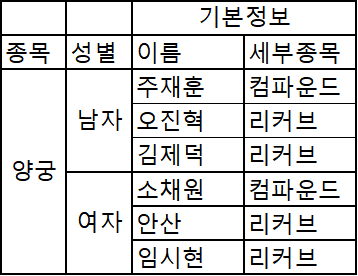

## Series에서 list로 multi-index 설정

In [ ]:
multi_index = [["a", "b", "a", "b", "a", "c", "c", "d", "d"],[1, 2, 2, 1, 3, 1, 2, 2, 3]]
data = pd.Series(np.random.uniform(size=9),
                 index=multi_index)

print('\ndata')
display(data)

print('\ndata.index')
display(data.index)


data


a  1    0.634401
b  2    0.849432
a  2    0.724455
b  1    0.611024
a  3    0.722443
c  1    0.322959
   2    0.361789
d  2    0.228263
   3    0.293714
dtype: float64


data.index


MultiIndex([('a', 1),
            ('b', 2),
            ('a', 2),
            ('b', 1),
            ('a', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [ ]:
# index 재정렬

print('After sorting the index')
display(data.sort_index(level=0))
print()
display(data.sort_index(level=1))
print()
# index의 위치를 바꾸는 함수
display(data.reorder_levels([1,0]))
print()
display(data.reorder_levels([1,0]).sort_index(level=0))

After sorting the index


a  1    0.634401
   2    0.724455
   3    0.722443
b  1    0.611024
   2    0.849432
c  1    0.322959
   2    0.361789
d  2    0.228263
   3    0.293714
dtype: float64

,,0
a,1,0.634401
b,1,0.611024
c,1,0.322959
a,2,0.724455
b,2,0.849432
c,2,0.361789
d,2,0.228263
a,3,0.722443
d,3,0.293714


1  a    0.634401
2  b    0.849432
   a    0.724455
1  b    0.611024
3  a    0.722443
1  c    0.322959
2  c    0.361789
   d    0.228263
3  d    0.293714
dtype: float64

1  a    0.634401
   b    0.611024
   c    0.322959
2  a    0.724455
   b    0.849432
   c    0.361789
   d    0.228263
3  a    0.722443
   d    0.293714
dtype: float64

In [ ]:
print('data["b"]')
display(data["b"])

print('\ndata.loc[["b","d"]]')
display(data.loc[["b","d"]])

print('\ndata.loc[("b",1)]')
display(data.loc[("b",1)])

data["b"]


,0
2,0.849432
1,0.611024



data.loc[["b","d"]]


b  2    0.849432
   1    0.611024
d  2    0.228263
   3    0.293714
dtype: float64


data.loc[("b",1)]


np.float64(0.6110235106775829)

In [ ]:
# Mulit-index Series를 데이터프레임으로
print('data.unstack()')
display(data.unstack())


data.unstack()


,1,2,3
a,0.634401,0.724455,0.722443
b,0.611024,0.849432,NaN
c,0.322959,0.361789,NaN
d,NaN,0.228263,0.293714


## Multi-level DataFrame

In [ ]:
multi_idx = [["a", "a", "b", "b"], [1, 2, 1, 2]]
multi_col = [["Ohio", "Ohio", "Colorado"],["Green", "Red", "Green"]]
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index = multi_idx,
                     columns = multi_col
                     )

print("Original")
display(frame)


Original


Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [ ]:
# index와 column의 이름 설정
frame.index.names = ["key1", "key2"]
frame.columns.names = ["state", "color"]

print('After setting index/columns names')
display(frame)

After setting index/columns names


state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
# 데이터 탐색

print('\nframe["Ohio"]')
display(frame["Ohio"])

print('\nframe.loc["Colorado","key1"]')
display(frame.loc['a',"Colorado"])


frame["Ohio"]


color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10


frame.loc["Colorado","key1"]


color,Green
key2,
1,2
2,5


In [ ]:
# index의 level 바꾸기
print('frame.swaplevel("key1","key2")')
display(frame.swaplevel("key1","key2"))

# index의 level 바꾼 후 sort_index
print('\nframe.swaplevel("key1","key2").sort_index(level=0)')
display(frame.swaplevel("key1","key2").sort_index(level=0))



frame.swaplevel("key1","key2")


state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11


frame.swaplevel("key1","key2").sort_index(level=0)


state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

In [ ]:
# 데이터 프레임의 unstack

print('frame.unstack(level=1)') # 3중 column
display(frame.unstack(level=1))

print('\nframe.unstack(level="key1")') # 3중 column
display(frame.unstack(level="key1"))

# index를 unstack 한 후 column으로 stack
print('\nframe.unstack(level="key1").stack(level="color")')
display(frame.unstack(level="key1").stack(level="color"))

frame.unstack(level=1)


state  Ohio            Colorado    
color Green    Red        Green    
key2      1  2   1   2        1   2
key1                               
a         0  3   1   4        2   5
b         6  9   7  10        8  11


frame.unstack(level="key1")


state  Ohio            Colorado    
color Green    Red        Green    
key1      a  b   a   b        a   b
key2                               
1         0  6   1   7        2   8
2         3  9   4  10        5  11


frame.unstack(level="key1").stack(level="color")


/tmp/ipython-input-9460865.py:11: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  display(frame.unstack(level="key1").stack(level="color"))


state      Ohio     Colorado      
key1          a   b        a     b
key2 color                        
1    Green    0   6      2.0   8.0
     Red      1   7      NaN   NaN
2    Green    3   9      5.0  11.0
     Red      4  10      NaN   NaN

# Reading and Writing Data in Text Format

* Pandas 함수를 통해 실제 데이터를 파일 형태로 읽고 저장할 수 있음
* 데이터 분석 시 주로 csv, json, pickle(pkl), txt 등의 파일 확장자 이용
* Pandas 함수를 통해 파일을 읽는 함수 및 파일의 종류

| Function       	| Description                                                                                                                 	|
|----------------	|-----------------------------------------------------------------------------------------------------------------------------	|
| read_csv       	| Load delimited data from a file, URL, or file-like object; use comma as default delimiter                                   	|
| read_fwf       	| Read data in fixed-width column format (i.e., no delimiters)                                                                	|
| read_clipboard 	| Variation of read_csv that reads data from the clipboard; useful for converting tables from web pages                       	|
| read_excel     	| Read tabular data from an Excel XLS or XLSX file                                                                            	|
| read_hdf       	| Read HDF5 files written by pandas                                                                                           	|
| read_html      	| Read all tables found in the given HTML document                                                                            	|
| read_json      	| Read data from a JSON (JavaScript Object Notation) string representation, file, URL, or file-like object                    	|
| read_feather   	| Read the Feather binary file format                                                                                         	|
| read_orc       	| Read the Apache ORC binary file format                                                                                      	|
| read_parquet   	| Read the Apache Parquet binary file format                                                                                  	|
| read_pickle    	| Read an object stored by pandas using the Python pickle format                                                              	|
| read_sas       	| Read a SAS dataset stored in one of the SAS system’s custom storage formats                                                 	|
| read_spss      	| Read a data file created by SPSS                                                                                            	|
| read_sql       	| Read the results of a SQL query (using SQLAlchemy)                                                                          	|
| read_sql_table 	| Read a whole SQL table (using SQLAlchemy); equivalent to using a query that selects everything in that table using read_sql 	|
| read_stata     	| Read a dataset from Stata file format                                                                                       	|
| read_xml       	| Read a table of data from an XML file                                                                                       	|

## csv file

### `pd.read_csv` 주요 arguments
* path : 파일 저장 경로 (ex | 'examples/ex1.csv')
* header : 파일 내 첫 번째행이 열 이름을 담고 있다면 0, 열 이름이 별도로 없으면 `None` 으로 설정
* index_col : 인덱스로 설정할 열이 있다면 해당 열의 위치로 설정 / 주로 0으로 설정
* na_values : 결측치를 대체할 값 설정 (default: np.nan)
* encoding : 인코딩 종류(ex | 'utf-8', 'cp949')

| Argument         	| Description                                                                                                                                                                                                                                                                                                      	|
|------------------	|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| path             	| String indicating filesystem location, URL, or file-like object.                                                                                                                                                                                                                                                 	|
| sep or delimiter 	| Character sequence or regular expression to use to split fields in each row.                                                                                                                                                                                                                                     	|
| header           	| Row number to use as column names; defaults to 0 (first row), but should be None if there is no header row.                                                                                                                                                                                                      	|
| index_col        	| Column numbers or names to use as the row index in the result; can be a single name/number or a list of them for a hierarchical index.                                                                                                                                                                           	|
| names            	| List of column names for result.                                                                                                                                                                                                                                                                                 	|
| skiprows         	| Number of rows at beginning of file to ignore or list of row numbers (starting from 0) to skip.                                                                                                                                                                                                                  	|
| na_values        	| Sequence of values to replace with NA. They are added to the default list unless keep_default_na=False is passed.                                                                                                                                                                                                	|
| keep_default_na  	| Whether to use the default NA value list or not (True by default).                                                                                                                                                                                                                                               	|
| comment          	| Character(s) to split comments off the end of lines.                                                                                                                                                                                                                                                             	|
| parse_dates      	| Attempt to parse data to datetime; False by default. If True, will attempt to parse all columns. Otherwise, can specify a list of column numbers or names to parse. If element of list is tuple or list, will combine multiple columns together and parse to date (e.g., if date/time split across two columns). 	|
| keep_date_col    	| If joining columns to parse date, keep the joined columns; False by default.                                                                                                                                                                                                                                     	|
| converters       	| Dictionary containing column number or name mapping to functions (e.g., {"foo": f} would apply the function f to all values in the "foo" column).                                                                                                                                                                	|
| dayfirst         	| When parsing potentially ambiguous dates, treat as international format (e.g., 7/6/2012 -> June 7, 2012); False by default.                                                                                                                                                                                      	|
| date_parser      	| Function to use to parse dates.                                                                                                                                                                                                                                                                                  	|
| nrows            	| Number of rows to read from beginning of file (not counting the header).                                                                                                                                                                                                                                         	|
| iterator         	| Return a TextFileReader object for reading the file piecemeal. This object can also be used with the with statement.                                                                                                                                                                                             	|
| chunksize        	| For iteration, size of file chunks.                                                                                                                                                                                                                                                                              	|
| skip_footer      	| Number of lines to ignore at end of file.                                                                                                                                                                                                                                                                        	|
| verbose          	| Print various parsing information, like the time spent in each stage of the file conversion and memory use information.                                                                                                                                                                                          	|
| encoding         	| Text encoding (e.g., "utf-8 for UTF-8 encoded text). Defaults to "utf-8" if None.                                                                                                                                                                                                                                	|
| squeeze          	| If the parsed data contains only one column, return a Series.                                                                                                                                                                                                                                                    	|
| thousands        	| Separator for thousands (e.g., "," or "."); default is None.                                                                                                                                                                                                                                                     	|
| decimal          	| Decimal separator in numbers (e.g., "." or ","); default is ".".                                                                                                                                                                                                                                                 	|
| engine           	| CSV parsing and conversion engine to use; can be one of "c", "python", or "pyarrow". The default is "c", though the newer "pyarrow" engine can parse some files much faster. The "python" engine is slower but supports some features that the other engines do not.                                             	|

In [69]:
file_path = "ex1.csv"
df = pd.read_csv(file_path,encoding = 'utf-8') # encoding = 'utf-8' 기본 값
display(df)

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [70]:
# 열 이름을 사전에 정의한 후 파일 읽기
col_names = [f"col_{i}" for i in range(5)]
file_path = "ex1.csv"
df = pd.read_csv(file_path, names = col_names)
display(df)

# 특정 열을 index로 설정하기
col_names = [f"col_{i}" for i in range(4)] + ["Index Column"]
file_path = "ex1.csv"
df = pd.read_csv(file_path, names = col_names, index_col = col_names[4])
display(df)

,col_0,col_1,col_2,col_3,col_4
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


,col_0,col_1,col_2,col_3
Index Column,,,,
message,a,b,c,d
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [71]:
# Multi-index 파일 읽기
file_path = 'csv_mindex.csv'
df = pd.read_csv(file_path)
print('Original')
display(df)

Original


,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


In [72]:
file_path = 'csv_mindex.csv'
index_col = ["key1","key2"]
mindex_df= pd.read_csv(file_path,
                       index_col = index_col)
print('Multi Index')
display(mindex_df)

Multi Index


value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [73]:
# 결측치 존재 데이터 불러오기
df = pd.read_csv("ex5.csv") # keep_default_na = True, na_values = np.nan 으로 설정되어 있음
print("Original")
display(df)

# 결측치 값 대체: 0
print(f'\nfilled_df')
filled_df = df.fillna(0)
display(filled_df)

Original


,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo



filled_df


,something,a,b,c,d,message
0,one,1,2,3.0,4,0
1,two,5,6,0.0,8,world
2,three,9,10,11.0,12,foo


### df.to_csv() 주요 arguments

* path : 파일의 저장 경로, 반드시 '.csv'로 끝나야 함
* index : 현 데이터 프레임의 index까지 함께 저장(default:`True`) | `False`로 저장하는 것이 보기 편함
* header : 현 데이터 프레임의 column까지 함께 저장(default: `True`)
* encoding: 인코딩의 종류, 주로 'utf-8'이나 'cp949'로 설정

In [74]:
# header는 주로 열 이름을 나타내기 때문에 포함시키고
# index는 특별히 index를 활용해야하는 경우에 포함시킴
save_arguments=dict(
  index = False,
  header = True,
  encoding = 'cp949'
)

filled_df.to_csv('ex5_filled_na.csv',**save_arguments)

In [75]:
save_arguments=dict(
  index = True,
  index_label = 'index',
  header = True,
  encoding = 'cp949'
)

filled_df.to_csv('ex5_filled_na_idx_True.csv',**save_arguments)